In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration

In [2]:
#Total Folder: group-data-by-boro
group_data = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/totals/group-data-by-boro.csv")

In [3]:
group_data.head()

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,213987.0,29897.0,8060.0,8359.18,1167.90,314.86,142721.0,21833.0,...,8148.0,9496.43,1348.98,361.51,57735.0,5483.0,1522.0,12125.56,1151.54,319.65
1,Age,0-4,5149.0,232.0,NaN,2814.80,126.83,NaN,3255.0,169.0,...,NaN,3154.75,107.22,NaN,1316.0,32.0,NaN,4811.00,116.98,NaN
2,Age,5-12,11335.0,142.0,NaN,4498.45,56.35,NaN,7195.0,95.0,...,NaN,4794.84,41.85,NaN,3129.0,15.0,NaN,6838.61,32.78,NaN
3,Age,13-17,8480.0,149.0,NaN,6050.15,106.31,NaN,5287.0,121.0,...,NaN,6387.20,99.31,NaN,2847.0,28.0,NaN,9532.58,93.75,NaN
4,Age,0-17,NaN,NaN,8.0,NaN,NaN,1.39,NaN,NaN,...,5.0,NaN,NaN,1.12,NaN,NaN,2.0,NaN,NaN,1.94


Checking which columns have missing values and what rows I will keep

In [4]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   group                  18 non-null     object 
 1   subgroup               18 non-null     object 
 2   BK_CASE_COUNT          17 non-null     float64
 3   BK_HOSPITALIZED_COUNT  17 non-null     float64
 4   BK_DEATH_COUNT         15 non-null     float64
 5   BK_CASE_RATE           17 non-null     float64
 6   BK_HOSPITALIZED_RATE   17 non-null     float64
 7   BK_DEATH_RATE          15 non-null     float64
 8   BX_CASE_COUNT          17 non-null     float64
 9   BX_HOSPITALIZED_COUNT  17 non-null     float64
 10  BX_DEATH_COUNT         15 non-null     float64
 11  BX_CASE_RATE           17 non-null     float64
 12  BX_HOSPITALIZED_RATE   17 non-null     float64
 13  BX_DEATH_RATE          15 non-null     float64
 14  MN_CASE_COUNT          17 non-null     float64
 15  MN_HOSPI

### Filling in missing values and creating new columns

I intent to keep the category 0-17 but since it has a lot of missing values, I will find them in by adding the rows above. For example: For 'BK_CASE_COUNT' 0-17 na row, I will add rows: 0-4,5-12 and 13-17. 

In [5]:
group_data = group_data.fillna((group_data[group_data['group']=='Age'][:3].sum()))

In [6]:
group_data.head()

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,213987.0,29897.0,8060.0,8359.18,1167.90,314.86,142721.0,21833.0,...,8148.0,9496.43,1348.98,361.51,57735.0,5483.0,1522.0,12125.56,1151.54,319.65
1,Age,0-4,5149.0,232.0,0.0,2814.80,126.83,0.00,3255.0,169.0,...,0.0,3154.75,107.22,0.00,1316.0,32.0,0.0,4811.00,116.98,0.00
2,Age,5-12,11335.0,142.0,0.0,4498.45,56.35,0.00,7195.0,95.0,...,0.0,4794.84,41.85,0.00,3129.0,15.0,0.0,6838.61,32.78,0.00
3,Age,13-17,8480.0,149.0,0.0,6050.15,106.31,0.00,5287.0,121.0,...,0.0,6387.20,99.31,0.00,2847.0,28.0,0.0,9532.58,93.75,0.00
4,Age,0-17,24964.0,523.0,8.0,13363.40,289.49,1.39,15737.0,385.0,...,5.0,14336.79,248.38,1.12,7292.0,75.0,2.0,21182.19,243.51,1.94


Now that the row 0-17 is full, I will drop the repeated categories(0-4,5-12 and 13-17) as well as the columns I won't be using

In [7]:
group_data.drop([1,2,3],inplace=True)

In [8]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 17
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   group                  15 non-null     object 
 1   subgroup               15 non-null     object 
 2   BK_CASE_COUNT          15 non-null     float64
 3   BK_HOSPITALIZED_COUNT  15 non-null     float64
 4   BK_DEATH_COUNT         15 non-null     float64
 5   BK_CASE_RATE           15 non-null     float64
 6   BK_HOSPITALIZED_RATE   15 non-null     float64
 7   BK_DEATH_RATE          15 non-null     float64
 8   BX_CASE_COUNT          15 non-null     float64
 9   BX_HOSPITALIZED_COUNT  15 non-null     float64
 10  BX_DEATH_COUNT         15 non-null     float64
 11  BX_CASE_RATE           15 non-null     float64
 12  BX_HOSPITALIZED_RATE   15 non-null     float64
 13  BX_DEATH_RATE          15 non-null     float64
 14  MN_CASE_COUNT          15 non-null     float64
 15  MN_HOSPI

In [9]:
for col in group_data.columns:
    if "RATE" in col or "HOSPITALIZED_COUNT" in col:
        group_data = group_data.drop(col, axis=1)

In [10]:
group_data = group_data[group_data['group']=='Age']

In [11]:
group_data

,group,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT
4,Age,0-17,24964.0,8.0,15737.0,6.0,8698.0,2.0,21051.0,5.0,7292.0,2.0
5,Age,18-24,19420.0,18.0,12811.0,8.0,10794.0,3.0,18129.0,7.0,6207.0,5.0
6,Age,25-34,40060.0,72.0,25152.0,61.0,22869.0,21.0,37920.0,71.0,9884.0,12.0
7,Age,35-44,33255.0,167.0,22214.0,158.0,15089.0,59.0,35081.0,228.0,8826.0,33.0
8,Age,45-54,29702.0,499.0,22724.0,381.0,13395.0,151.0,35165.0,522.0,9134.0,90.0
9,Age,55-64,29499.0,1166.0,21638.0,934.0,13320.0,396.0,33129.0,1364.0,8410.0,181.0
10,Age,65-74,20586.0,2011.0,12615.0,1379.0,8995.0,781.0,18977.0,2010.0,4529.0,358.0
11,Age,75+,16306.0,4119.0,9625.0,2439.0,8942.0,2157.0,14449.0,3941.0,3436.0,841.0


In [12]:
group_data["BK_FATALITY_RATE"] =  group_data["BK_DEATH_COUNT"]/group_data["BK_CASE_COUNT"]

In [13]:
group_data["BX_FATALITY_RATE"] =  group_data["BX_DEATH_COUNT"]/group_data["BX_CASE_COUNT"]

In [14]:
group_data["MN_FATALITY_RATE"] =  group_data["MN_DEATH_COUNT"]/group_data["MN_CASE_COUNT"]

In [15]:
group_data["QN_FATALITY_RATE"] =  group_data["QN_DEATH_COUNT"]/group_data["QN_CASE_COUNT"]

In [16]:
group_data["SI_FATALITY_RATE"] =  group_data["SI_DEATH_COUNT"]/group_data["SI_CASE_COUNT"]

In [17]:
group_data

,group,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT,BK_FATALITY_RATE,BX_FATALITY_RATE,MN_FATALITY_RATE,QN_FATALITY_RATE,SI_FATALITY_RATE
4,Age,0-17,24964.0,8.0,15737.0,6.0,8698.0,2.0,21051.0,5.0,7292.0,2.0,0.000320,0.000381,0.000230,0.000238,0.000274
5,Age,18-24,19420.0,18.0,12811.0,8.0,10794.0,3.0,18129.0,7.0,6207.0,5.0,0.000927,0.000624,0.000278,0.000386,0.000806
6,Age,25-34,40060.0,72.0,25152.0,61.0,22869.0,21.0,37920.0,71.0,9884.0,12.0,0.001797,0.002425,0.000918,0.001872,0.001214
7,Age,35-44,33255.0,167.0,22214.0,158.0,15089.0,59.0,35081.0,228.0,8826.0,33.0,0.005022,0.007113,0.003910,0.006499,0.003739
8,Age,45-54,29702.0,499.0,22724.0,381.0,13395.0,151.0,35165.0,522.0,9134.0,90.0,0.016800,0.016766,0.011273,0.014844,0.009853
9,Age,55-64,29499.0,1166.0,21638.0,934.0,13320.0,396.0,33129.0,1364.0,8410.0,181.0,0.039527,0.043165,0.029730,0.041172,0.021522
10,Age,65-74,20586.0,2011.0,12615.0,1379.0,8995.0,781.0,18977.0,2010.0,4529.0,358.0,0.097688,0.109314,0.086826,0.105918,0.079046
11,Age,75+,16306.0,4119.0,9625.0,2439.0,8942.0,2157.0,14449.0,3941.0,3436.0,841.0,0.252606,0.253403,0.241221,0.272752,0.244761


### Graphing
#### Now that I have all the data I will need for Diagram #2 (The infection: # of cases for each borough and the fatality rate for each borough. I will start plotting. 

In [89]:
x = group_data["subgroup"]

In [103]:
y1 = group_data.iloc[:,2:12:2]
y2 = group_data.iloc[:, 12:]

In [105]:
type(new_y1)

pandas.core.frame.DataFrame

In [106]:
y1

,BK_CASE_COUNT,BX_CASE_COUNT,MN_CASE_COUNT,QN_CASE_COUNT,SI_CASE_COUNT
4,24964.0,15737.0,8698.0,21051.0,7292.0
5,19420.0,12811.0,10794.0,18129.0,6207.0
6,40060.0,25152.0,22869.0,37920.0,9884.0
7,33255.0,22214.0,15089.0,35081.0,8826.0
8,29702.0,22724.0,13395.0,35165.0,9134.0
9,29499.0,21638.0,13320.0,33129.0,8410.0
10,20586.0,12615.0,8995.0,18977.0,4529.0
11,16306.0,9625.0,8942.0,14449.0,3436.0


In [71]:
y2

,BK_FATALITY_RATE,BX_FATALITY_RATE,MN_FATALITY_RATE,QN_FATALITY_RATE,SI_FATALITY_RATE
4,0.000320,0.000381,0.000230,0.000238,0.000274
5,0.000927,0.000624,0.000278,0.000386,0.000806
6,0.001797,0.002425,0.000918,0.001872,0.001214
7,0.005022,0.007113,0.003910,0.006499,0.003739
8,0.016800,0.016766,0.011273,0.014844,0.009853
9,0.039527,0.043165,0.029730,0.041172,0.021522
10,0.097688,0.109314,0.086826,0.105918,0.079046
11,0.252606,0.253403,0.241221,0.272752,0.244761


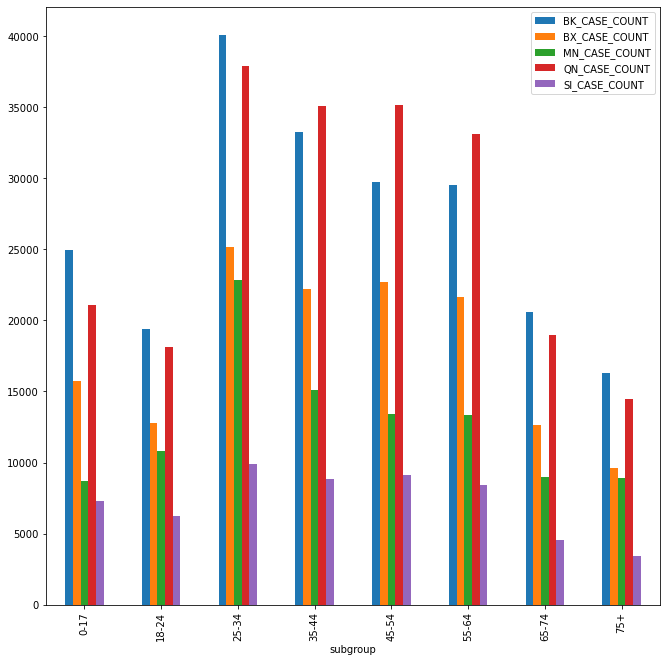

In [116]:
group_data.groupby('subgroup')[['BK_CASE_COUNT','BX_CASE_COUNT','MN_CASE_COUNT','QN_CASE_COUNT','SI_CASE_COUNT']].sum().plot(kind='bar', figsize= (11,11))

In [ ]:
group_data.groupby('subgroup')[['BK_CASE_COUNT','BX_CASE_COUNT','MN_CASE_COUNT','QN_CASE_COUNT','SI_CASE_COUNT']].sum().plot(kind='bar', figsize= (9,11))

In [125]:
borough = 'BK_CASE_COUNT'

In [127]:
borough_fatality = 'BK_FATALITY_RATE'

In [131]:
group_data[["subgroup","BK_CASE_COUNT", "BK_FATALITY_RATE" ]]

,subgroup,BK_CASE_COUNT,BK_FATALITY_RATE
4,0-17,24964.0,0.000320
5,18-24,19420.0,0.000927
6,25-34,40060.0,0.001797
7,35-44,33255.0,0.005022
8,45-54,29702.0,0.016800
9,55-64,29499.0,0.039527
10,65-74,20586.0,0.097688
11,75+,16306.0,0.252606


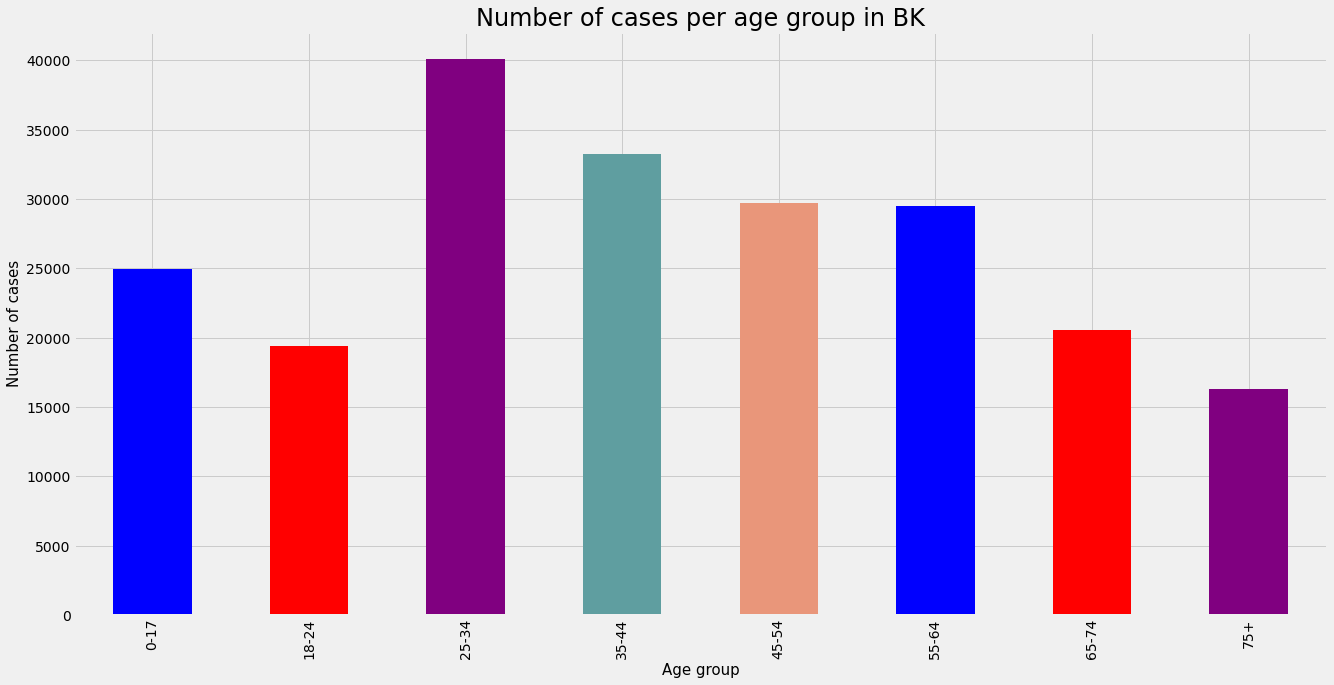

In [135]:
from matplotlib import style

plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("blue", "red", "purple",'cadetblue','darksalmon')
group_data.groupby('subgroup')[borough].sum().plot(kind='bar',color=color)
group_data.groupby('subgroup')[borough_fatality].sum().plot(kind='bar',color=color)
ax.set_title(f'Number of cases per age group in {borough[:2]}',size=24)
ax.set_xlabel('Age group',size=15)
ax.set_ylabel('Number of cases', size=15)
plt.show()

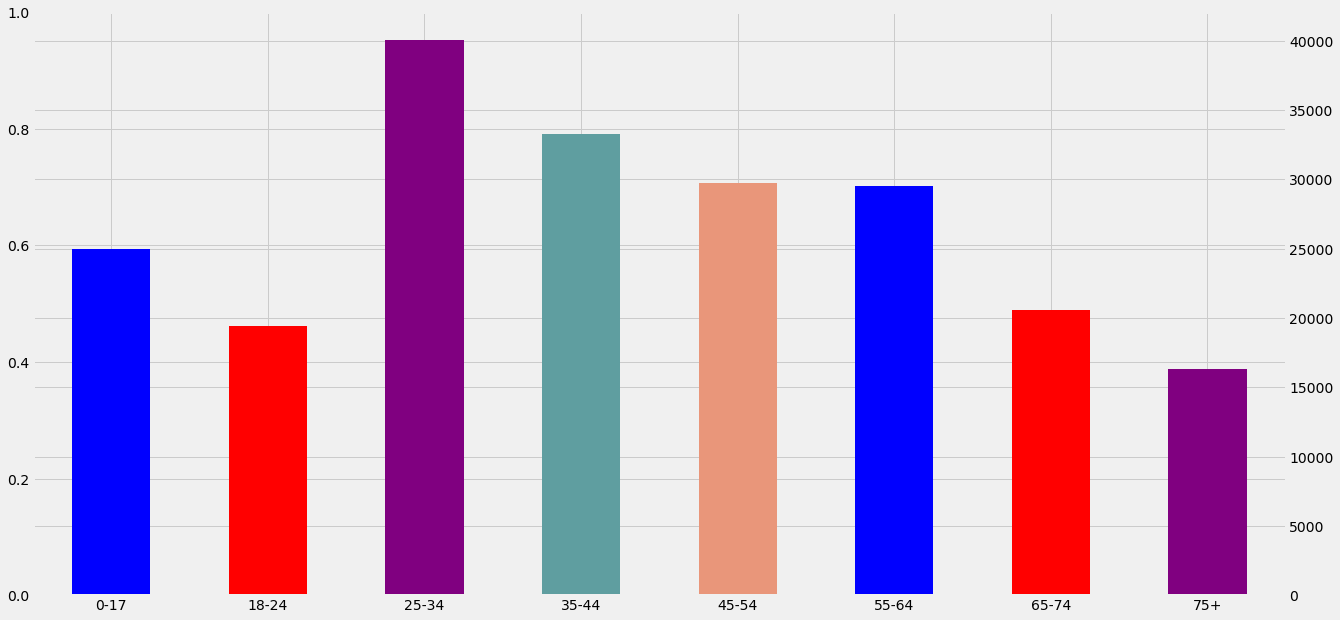

In [129]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import style
%matplotlib inline

plt.style.use('fivethirtyeight')
fig, ax1= plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()
bar1 = group_data.groupby('subgroup')[borough].sum().plot(kind='bar',color=color)
bar2 = group_data.groupby('subgroup')[borough_fatality].sum().plot(kind='bar',color=color)
plt.plot()
plt.show()

In [32]:
#Trends Folder: data by day
data_day =pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv")

In [33]:
data_day

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,SI_PROBABLE_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,04/02/2021,2420,860,222,50,5,2640,3605,228,50,...,64,17,2,0,226,295,15,3,3,11000
399,04/03/2021,1918,628,195,41,7,2604,3537,221,48,...,41,6,0,0,224,288,14,3,3,11000
400,04/04/2021,1350,633,169,33,13,2557,3471,219,45,...,52,12,2,0,221,285,14,2,2,11000
401,04/05/2021,2911,1010,157,34,19,2487,3365,204,43,...,69,10,4,0,216,274,13,3,3,11000


In [ ]:
data_day.info()

In [ ]:
#Totals Folder: by_boro
totals_boro = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/totals/by-boro.csv")

In [ ]:
totals_boro